# Car Parts Dataset Example

This example show how to read this dataset, contained in the format of COCO Dataset, by using Python.

## Import libraries

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO

import skimage.io as io

## Dataset Exploration

**1) Initialize the COCO api for instance annotations**

In [3]:
data_dir='./trainingset'
annotation_file='{}/annotations.json'.format(data_dir)

coco=COCO(annotation_file)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


**2) Load the categories in a variable**

In [4]:
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

**3) Explore result of `cats`**

In [5]:
print('ID \t: Class Name')
print("-----------------")
for i in cats:
    print('{}\t: {}'.format(i['id'], i['name']))

ID 	: Class Name
-----------------
1	: _background_
2	: back_bumper
3	: back_glass
4	: back_left_door
5	: back_left_light
6	: back_right_door
7	: back_right_light
8	: front_bumper
9	: front_glass
10	: front_left_door
11	: front_left_light
12	: front_right_door
13	: front_right_light
14	: hood
15	: left_mirror
16	: right_mirror
17	: tailgate
18	: trunk
19	: wheel


**4) Load images**

In [6]:
imgIds = coco.getImgIds()
images = coco.loadImgs(imgIds)

**5) Pick one random image and its annotations**

In [7]:
random_imgId = imgIds[np.random.randint(0,len(imgIds))]
img = coco.loadImgs(random_imgId)[0]

In [8]:
img

{'id': 2,
 'dataset_id': 1,
 'category_ids': [],
 'path': 'JPEGImages/train10.jpg',
 'width': 512,
 'height': 512,
 'file_name': 'train10.jpg',
 'annotated': False,
 'annotating': [],
 'num_annotations': 0,
 'metadata': {},
 'deleted': False,
 'milliseconds': 0,
 'events': [],
 'regenerate_thumbnail': False}

**6) Show picked image**

In [9]:
I = io.imread('{}/{}'.format(data_dir,img['path']))/255.0

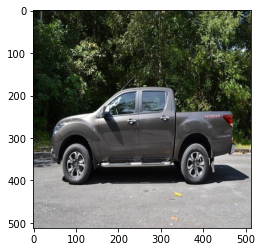

In [10]:
plt.imshow(I)

**7) Load its annotations and show picked image with overlay of annotation masks**

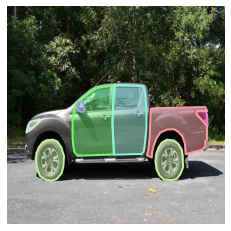

In [11]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')

annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

**Data in variable `anns`**

In [12]:
anns

[{'id': 248,
  'image_id': 2,
  'category_id': 19,
  'segmentation': [[106.8,
    313.5,
    117.4,
    317.6,
    126.8,
    331.2,
    133.3,
    352.4,
    131.5,
    377.1,
    127.4,
    392.9,
    116.2,
    405.9,
    105.1,
    410.0,
    90.9,
    408.2,
    76.8,
    398.8,
    70.4,
    382.9,
    67.4,
    364.7,
    68.0,
    345.9,
    73.9,
    331.2,
    83.3,
    319.4,
    92.7,
    314.7],
   [392.1,
    315.3,
    402.7,
    323.5,
    410.9,
    337.6,
    413.9,
    377.6,
    407.4,
    394.1,
    398.6,
    405.9,
    388.0,
    408.8,
    369.2,
    407.6,
    358.0,
    397.6,
    351.5,
    384.1,
    348.6,
    363.5,
    350.4,
    347.1,
    355.6,
    332.4,
    363.3,
    320.6,
    375.1,
    313.5]],
  'area': 10047,
  'bbox': [67.0, 314.0, 347.0, 96.0],
  'iscrowd': False,
  'isbbox': False,
  'color': '#7706ae',
  'metadata': {}},
 {'id': 249,
  'image_id': 2,
  'category_id': 11,
  'segmentation': [[44.5,
    296.5,
    56.2,
    288.8,
    78.0,
  

**7) Get the annotation categories of picked image**

In [13]:
picked_image_annIDs = [i['category_id'] for i in anns]
picked_image_cats = coco.loadCats(picked_image_annIDs)

In [14]:
print('ID \t: Class Name')
print("-----------------")
for i in picked_image_cats:
    print('{} \t: {}'.format(i['id'], i['name']))

ID 	: Class Name
-----------------
19 	: wheel
11 	: front_left_light
10 	: front_left_door
4 	: back_left_door
5 	: back_left_light
18 	: trunk
15 	: left_mirror
